In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from utils import read_datacube
from crossval import cross_validate

In [2]:
# Model params as used in the Furnaces project
model_params = {"n_estimators":500, "criterion":"mse", "random_state":42, "max_features":7, "n_jobs":60,
                "oob_score":True, "min_samples_split":2, "min_samples_leaf":1, "min_weight_fraction_leaf":0.0,
                "max_leaf_nodes":None, "min_impurity_decrease":0.0, "min_impurity_split":None, "bootstrap":True,
                "verbose":0, "warm_start":False, "ccp_alpha":0.0, "max_samples":None}

## Random Forest

In [5]:
full_data = read_datacube("../data/australia_9y.nc", silent=True)
full_size = len(full_data)
df_size = 1000
size_growth = 1000

full_data = full_data.sample(frac=1)

scores_default = []
scores_smogn = []
sizes = []

with tqdm(total=(full_size-df_size)/size_growth) as pbar:
    pbar.set_description("Running SMOGN with increasing input sizes")
    while df_size <= full_size:
        df = full_data.head(df_size)
        score_default = np.mean(cross_validate(df, model_params, use_smogn=False, folds=10, rel_thresh=0.1, normalize=True, tqdm_silent=True))
        score_smogn = np.mean(cross_validate(df, model_params, use_smogn=True, folds=10, rel_thresh=0.1, normalize=True, tqdm_silent=True))
        scores_default.append(score_default)
        scores_smogn.append(score_smogn)
        sizes.append(len(df))
        df_size += size_growth
        pbar.update(1)

Running SMOGN with increasing input sizes:  98%|█████████▊| 48/48.788 [5:01:44<09:26, 718.99s/it]  /home/user1/anaconda3/envs/smogn/lib/python3.9/site-packages/tqdm/std.py:532: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Running SMOGN with increasing input sizes: 100%|██████████| 49/48.788 [5:14:51<-1:58:39, 385.54s/it]


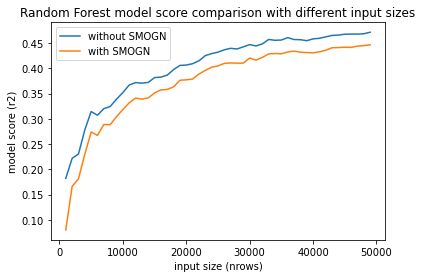

In [8]:
plt.plot(sizes, scores_default, label="without SMOGN")
plt.plot(sizes, scores_smogn, label="with SMOGN")
plt.xlabel("input size (nrows)")
plt.ylabel("model score (r2)")
plt.title("Random Forest model score comparison with different input sizes")
plt.legend()
plt.show()

## SVM

In [4]:
full_data = read_datacube("../data/australia_9y.nc", silent=True)
full_size = len(full_data)
df_size = 1000
size_growth = 1000

full_data = full_data.sample(frac=1)

scores_default2 = []
scores_smogn2 = []
sizes2 = []

with tqdm(total=(full_size-df_size)/size_growth) as pbar:
    pbar.set_description("Running SMOGN with increasing input sizes")
    while df_size <= full_size:
        df = full_data.head(df_size)
        score_default = np.mean(cross_validate(df, None, use_smogn=False, folds=10, rel_thresh=0.1, normalize=True, tqdm_silent=True, rf=False))
        score_smogn = np.mean(cross_validate(df, None, use_smogn=True, folds=10, rel_thresh=0.1, normalize=True, tqdm_silent=True, rf=False))
        scores_default2.append(score_default)
        scores_smogn2.append(score_smogn)
        sizes2.append(len(df))
        df_size += size_growth
        pbar.update(1)

Running SMOGN with increasing input sizes:  98%|█████████▊| 48/48.788 [11:54:17<32:16, 2457.27s/it]  /home/user1/anaconda3/envs/smogn/lib/python3.9/site-packages/tqdm/std.py:532: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Running SMOGN with increasing input sizes: 100%|██████████| 49/48.788 [12:43:09<-1:56:42, 934.48s/it] 


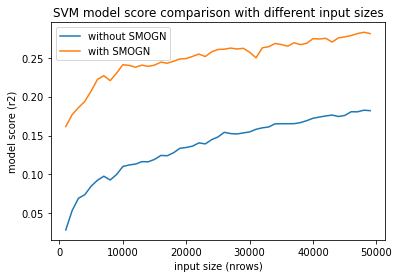

In [6]:
plt.plot(sizes2, scores_default2, label="without SMOGN")
plt.plot(sizes2, scores_smogn2, label="with SMOGN")
plt.xlabel("input size (nrows)")
plt.ylabel("model score (r2)")
plt.title("SVM model score comparison with different input sizes")
plt.legend()
plt.show()